In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
file1 = "data/mouse_drug_data.csv"
file2 = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(file1)
clinical_df = pd.read_csv(file2)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


Experiment - ask tutor

In [3]:
df1 = merge_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]


df1 = df1.groupby(["Drug", "Timepoint"])
df1.head()

df1 = pd.DataFrame(df1)
df1.head()
#df1.groups

,0,1
0,"(Capomulin, 0)",Drug Timepoint Tumor Volume (mm3) ...
1,"(Capomulin, 5)",Drug Timepoint Tumor Volume (mm3) ...
2,"(Capomulin, 10)",Drug Timepoint Tumor Volume (mm3) ...
3,"(Capomulin, 15)",Drug Timepoint Tumor Volume (mm3) ...
4,"(Capomulin, 20)",Drug Timepoint Tumor Volume (mm3) ...


## Tumor Response to Treatment  - Means (done)

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_data = merge_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
#drug_group_tumor = merge_df[["Mouse ID", "Drug", "Timepoint", "Tumor Volume (mm3)"]]

#reset index so drug shows up on every row
tumor_mean = tumor_data.groupby(["Drug", "Timepoint"]).mean().reset_index()

#Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean_df.head(25)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#reset index so drug shows up on every row
tumor_sem = merge_df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"].reset_index()

# # Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem)

# Preview DataFrame
tumor_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


## Tumor Response to treatment - format SEM

In [6]:
# Minor Data Munging to Re-Format the Data Frames for SEM

#pivot the table.  Got this code from Shayzee
#more information on pandas pivot at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
tumor_sem_df=tumor_sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


## Tumor Response to treatment - format Tumor size

In [7]:
# Minor Data Munging to Re-Format the Data Frames for Tumor size
tumor_mean_df = tumor_mean_df.reset_index()
tumor_mean_df=tumor_mean_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


## Plot Tumor Response

In [8]:
tumor_mean_df.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

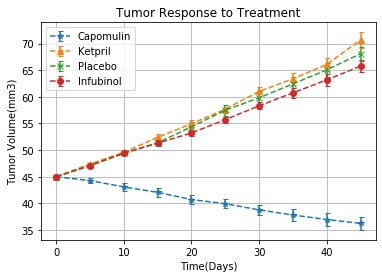

In [9]:
#turmor response to treatment

# Generate the Plot (with Error Bars)
# Format code from Shayzee

x_axis = tumor_mean_df.index  
plt.errorbar(x_axis, tumor_mean_df["Capomulin"], yerr = tumor_sem_df["Capomulin"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(x_axis, tumor_mean_df["Ketapril"], yerr = tumor_sem_df["Ketapril"], fmt = '^--', capsize = 2.5, label = "Ketpril")
plt.errorbar(x_axis, tumor_mean_df["Placebo"], yerr = tumor_sem_df["Placebo"], fmt = 'x--', capsize = 2.5, label = "Placebo")
plt.errorbar(x_axis, tumor_mean_df["Infubinol"], yerr = tumor_sem_df["Infubinol"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

#legend
plt.legend(loc="best")

#gridlines
plt.grid(alpha=1)

#labels
plt.title("Tumor Response to Treatment") 
plt.xlabel("Time(Days)") 
plt.ylabel("Tumor Volume(mm3)")

#x and y limits
#plt.xlim(0,50)
#plt.ylim(34,75)

# Save and show the Figure
plt.savefig("Images/Tumor_Response.png")
plt.show()

## Metastatic Response to Treatment - means (done)

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mest_data = merge_df[["Drug", "Timepoint", "Metastatic Sites"]]

#reset index so drug shows up on every row
mest_mean = mest_data.groupby(["Drug", "Timepoint"]).mean().reset_index()

# Convert to DataFrame
mest_mean_df = pd.DataFrame(mest_mean)

# Preview DataFrame
mest_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


## Metastatic Response to Treatment - SEM (Done)

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
#reset index so drug shows up on every row
mest_sem = merge_df.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"].reset_index()

# Convert to DataFrame
mest_sem_df = pd.DataFrame(mest_sem)

# Preview DataFrame
mest_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


## Metastatic Response to Treatment - Format Means

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mest_mean_df=mest_mean_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
mest_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


## Metastatic Response to Treatment - Format SEM

In [13]:
mest_sem_df = mest_sem_df.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]
mest_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


## Plot Metastic

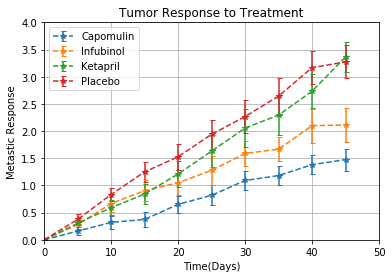

In [14]:
plt.errorbar(x_axis, mest_mean_df["Capomulin"], yerr = mest_sem_df["Capomulin"], fmt='*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(x_axis, mest_mean_df["Infubinol"], yerr = mest_sem_df["Infubinol"], fmt='*--', capsize = 2.5, label = "Infubinol")
plt.errorbar(x_axis, mest_mean_df["Ketapril"], yerr = mest_sem_df["Ketapril"], fmt='*--', capsize = 2.5, label = "Ketapril")
plt.errorbar(x_axis, mest_mean_df["Placebo"], yerr = mest_sem_df["Placebo"], fmt='*--', capsize = 2.5, label = "Placebo")

#legend
plt.legend(loc="best")

#gridlines
plt.grid(alpha=1)

#labels
plt.title("Tumor Response to Treatment") 
plt.xlabel("Time(Days)") 
plt.ylabel("Metastic Response")

# x limits and y limits
plt.xlim(0,50)
plt.ylim(0.0,4)

# Save and show the Figure
plt.savefig("Images/Metastic_Response.png")
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = merge_df.groupby(["Drug","Timepoint"]).count()
survival = survival["Mouse ID"]

# Convert to DataFrame
#reset index so drug shows up on every row
survival_df = pd.DataFrame(survival).reset_index()

# Preview DataFrame
survival_df.head(100)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [16]:
# Minor Data Munging to Re-Format the Data Frames
survival_df = survival_df.pivot(index= "Timepoint", columns = "Drug")["Mouse ID"]

# Preview the Data Frame
survival_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


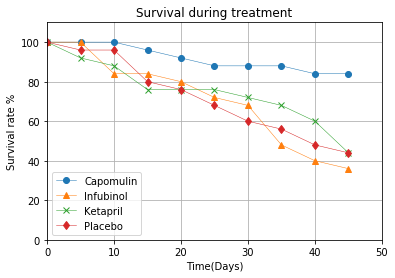

In [17]:
# Generate the Plot (Accounting for percentages)

#num of mice per drug
mice_count_per_drug = 25

plt.plot(x_axis, (survival_df["Capomulin"]/mice_count_per_drug)*100, linewidth=0.5, marker ='o', label="Capomulin")
plt.plot(x_axis, (survival_df["Infubinol"]/mice_count_per_drug)*100, linewidth=0.5, marker ='^', label="Infubinol")
plt.plot(x_axis, (survival_df["Ketapril"]/mice_count_per_drug)*100, linewidth=0.5, marker ='x', label="Ketapril")
plt.plot(x_axis, (survival_df["Placebo"]/mice_count_per_drug)*100, linewidth=0.5, marker ='d', label="Placebo")


# format and ave the Figure
#legend
plt.legend(loc="best")

#gridlines
plt.grid(alpha=1)

#labels
plt.title("Survival during treatment") 
plt.xlabel("Time(Days)") 
plt.ylabel("Survival rate %")

# x limits and y limits
plt.xlim(0,50)
plt.ylim(0, 110, 10)

# Save and show the Figure
plt.savefig("Images/Survival_Rate.png")
plt.show()

# Show the Figure
#plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph - calculate % change

In [18]:
# Calculate the percent changes for each drug with help from tutor

tumor_mean_summary = tumor_mean_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

tumor_change = ((tumor_mean_summary.iloc[-1] - tumor_mean_summary.iloc[0])/tumor_mean_summary.iloc[-0])
tumor_change = pd.DataFrame(tumor_change).reset_index()
tumor_change.columns =["Drug", "Tumor Volume Change"]
#tumor_change["Tumor Volume Change"] =tumor_change["Tumor Volume Change"].map("{:.0%}".format)

tumor_change


,Drug,Tumor Volume Change
0,Capomulin,-0.194753
1,Infubinol,0.461235
2,Ketapril,0.570288
3,Placebo,0.512980


## Summary Bar Graph - Plot

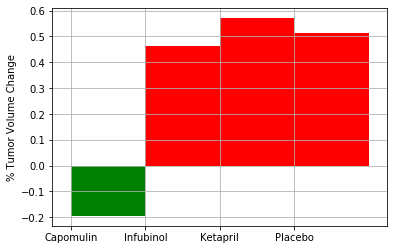

In [22]:
#color bars - code from stack overflow
#https://stackoverflow.com/questions/22311139/matplotlib-bar-chart-choose-color-if-value-is-positive-vs-value-is-negative
#fig, ax = plt.subplots()

tumor_change.plot(kind='bar',x='Drug',y='Tumor Volume Change', 
                  rot=0, legend = None,  width=1.0, align = "edge",
                  color=(tumor_change['Tumor Volume Change'] < 0).map({True: 'g', False: 'r'}))



plt.grid(alpha=1)
plt.xlabel("") 
plt.ylabel("% Tumor Volume Change") 
plt.grid(alpha=1)
plt.savefig("Images/Tumor_Volume_Change.png")
plt.show()


#alternative code for plotting bar char
#tumor_change.plot.bar(x="Drug", y="Tumor Volume Change", rot=0)
#tumor_change.plot(kind='bar', title ="V comp",figsize=(10,5),legend=True, fontsize=12, color = "red")

![Metastatic Spread During Treatment](../Images/change.png)